## Importing Libraries 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing and Encoding Dataset

In [2]:
df = pd.read_csv('mushrooms.csv')

from sklearn.preprocessing import LabelEncoder #importing LabelEncoder class for encoding data
le = LabelEncoder() #creating label encode object to encode data
for column in df.columns: #encoding all features in the independent variables
    df[column] = le.fit_transform(df[column])
    
#Exempts last column from being included (rows:column)
X = df.iloc[:, 1:]
Y = df.iloc[:, 0]

df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


## Splitting the data into test and training data

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Print the training data to verify
#print(X)
#print(Y)

## Selecting best Featuers

In [4]:
# Importing PCA from the decomposition library
from sklearn.decomposition import PCA
pca = PCA (n_components = 5)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

## Creating Histograms for each Feature

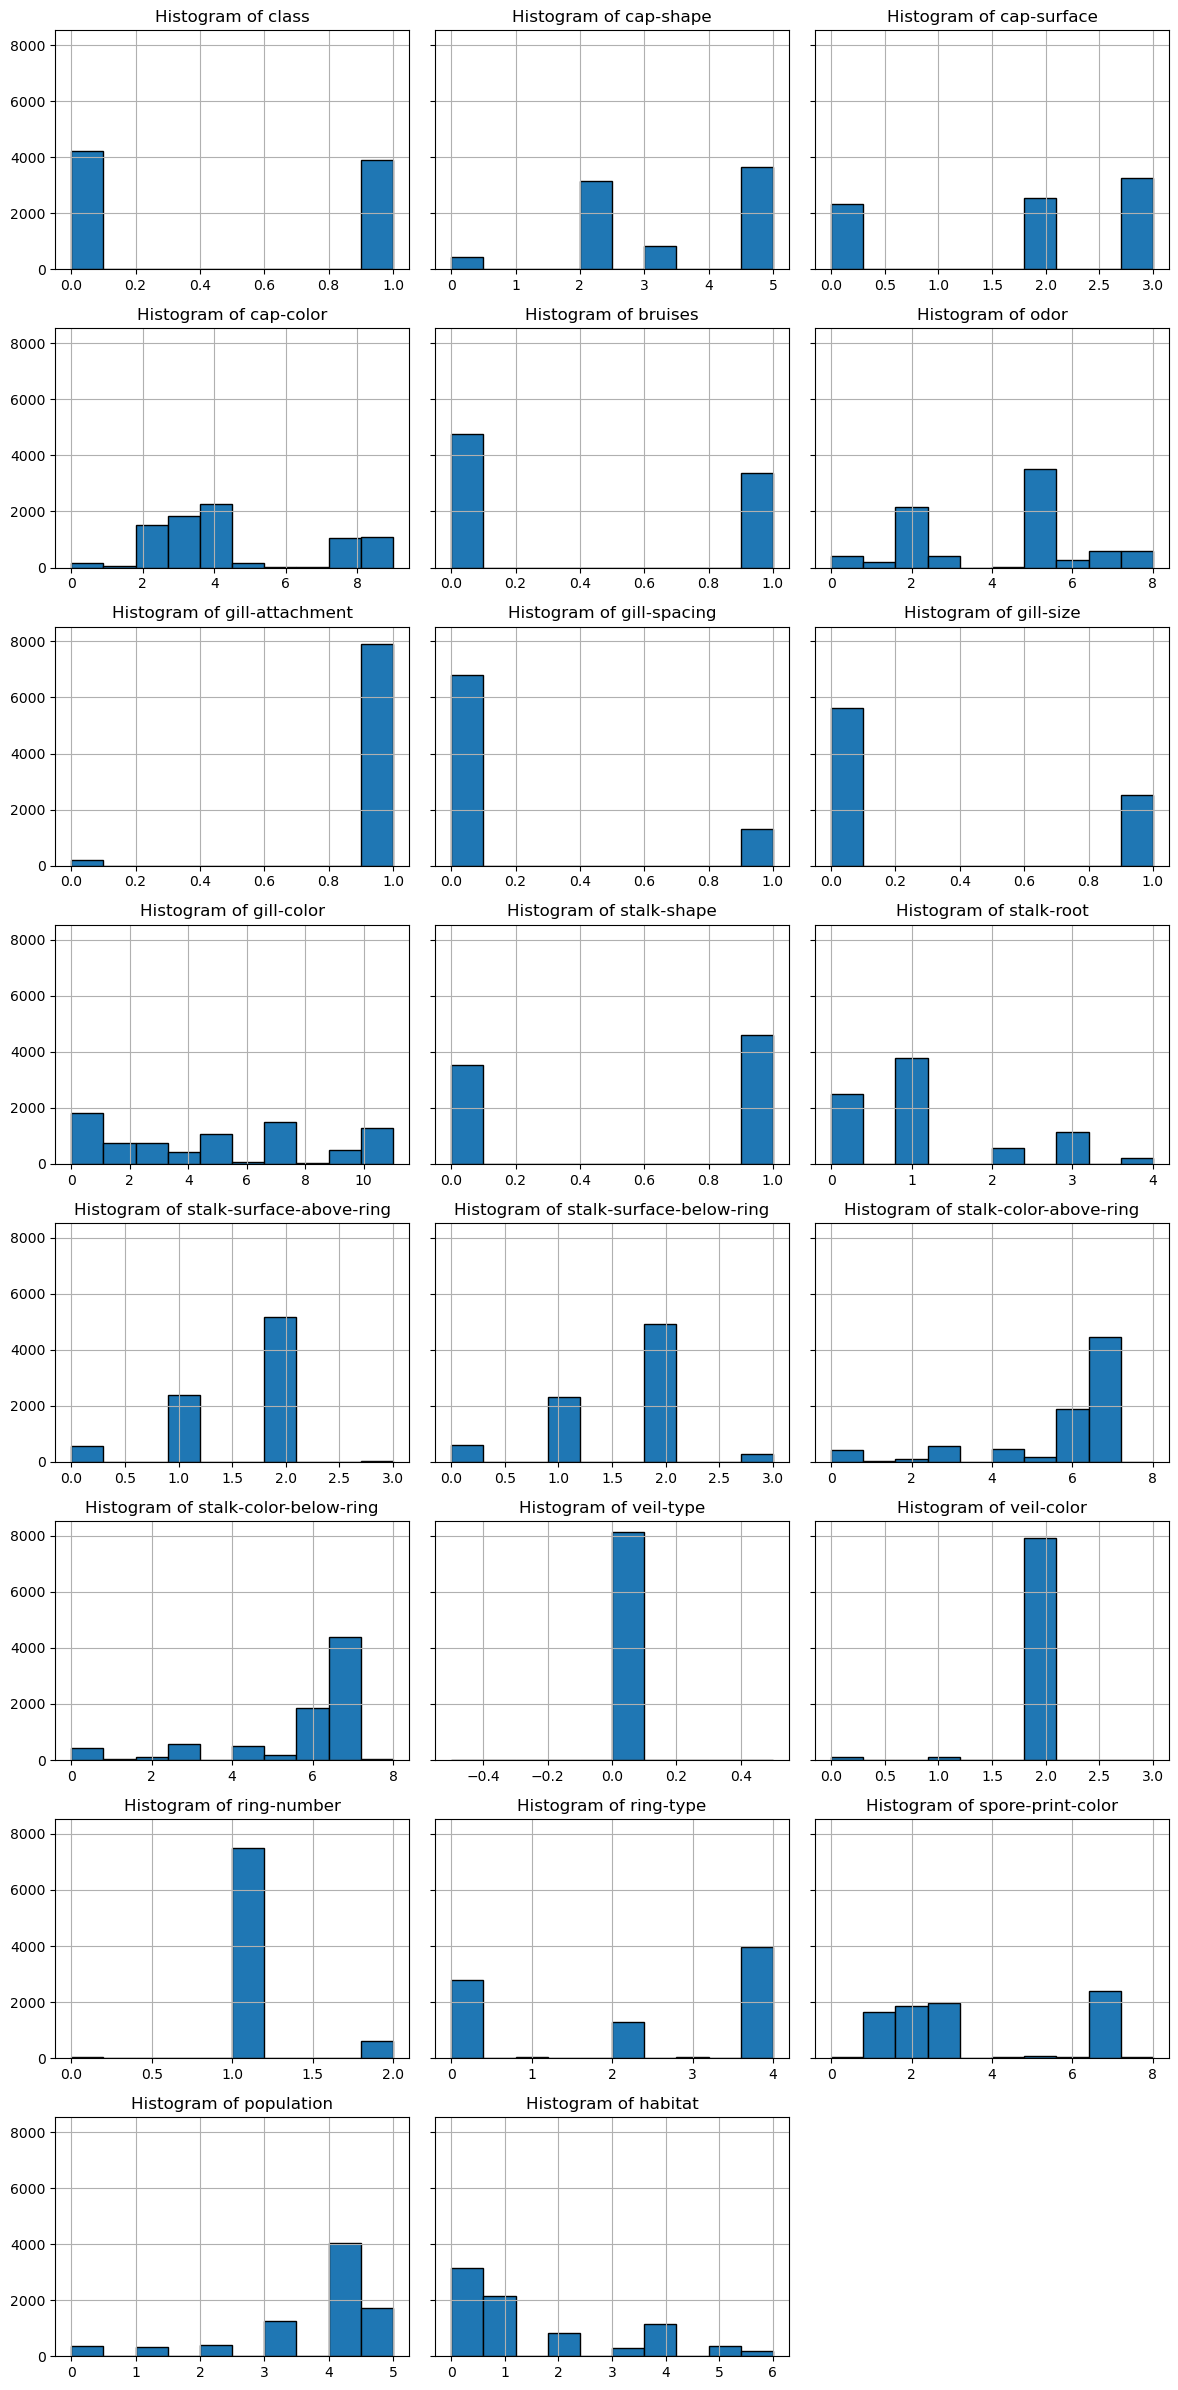

In [5]:
# Calculate the number of rows needed for the subplots
num_rows = (23 + 2) // 3 # Adding 2 to round up the division

# Create a figure with the calculated number of rows and 3 columns
fig, axs = plt.subplots(num_rows, 3, figsize=(12, 3 * num_rows), sharey=True)

# Flatten the axes array for easier iteration
axs = axs.flatten()

# Creating histogram for each of the 23 variables
for i in range(23):
    # Calculate the row and column indices for the current subplot
    row = i // 3
    col = i % 3
    # Plot the histogram on the subplot
    df.iloc[:, i].hist(bins=10, edgecolor='black', ax=axs[i])
    # Set the title of the histogram with the column name
    axs[i].set_title(f'Histogram of {df.columns[i]}')

# Adjust layout for better spacing
plt.tight_layout()

# Remove the last subplot if it's not needed
if num_rows * 3 > 23:
    fig.delaxes(axs[-1])

plt.show() # Display the histograms

## Pie chart 

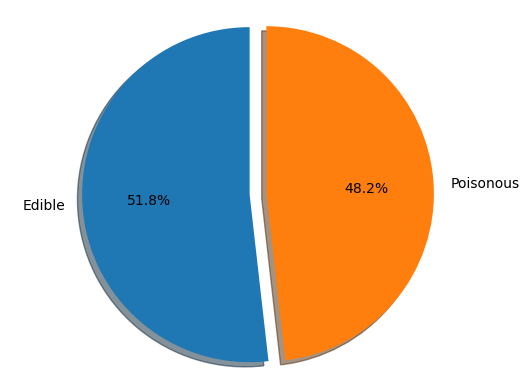

In [6]:
class_counts = df['class'].value_counts()

# Extract labels and sizes from the value_counts Series
labels = 'Edible' , 'Poisonous'
sizes = class_counts.values.tolist()

# Define the explode parameter to highlight a specific slice
# Here, we're exploding the second slice (i.e., 'Poisonous')
explode = (0, 0.1)

# Create the pie chart
fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## Making a correlation matrix of the different variables

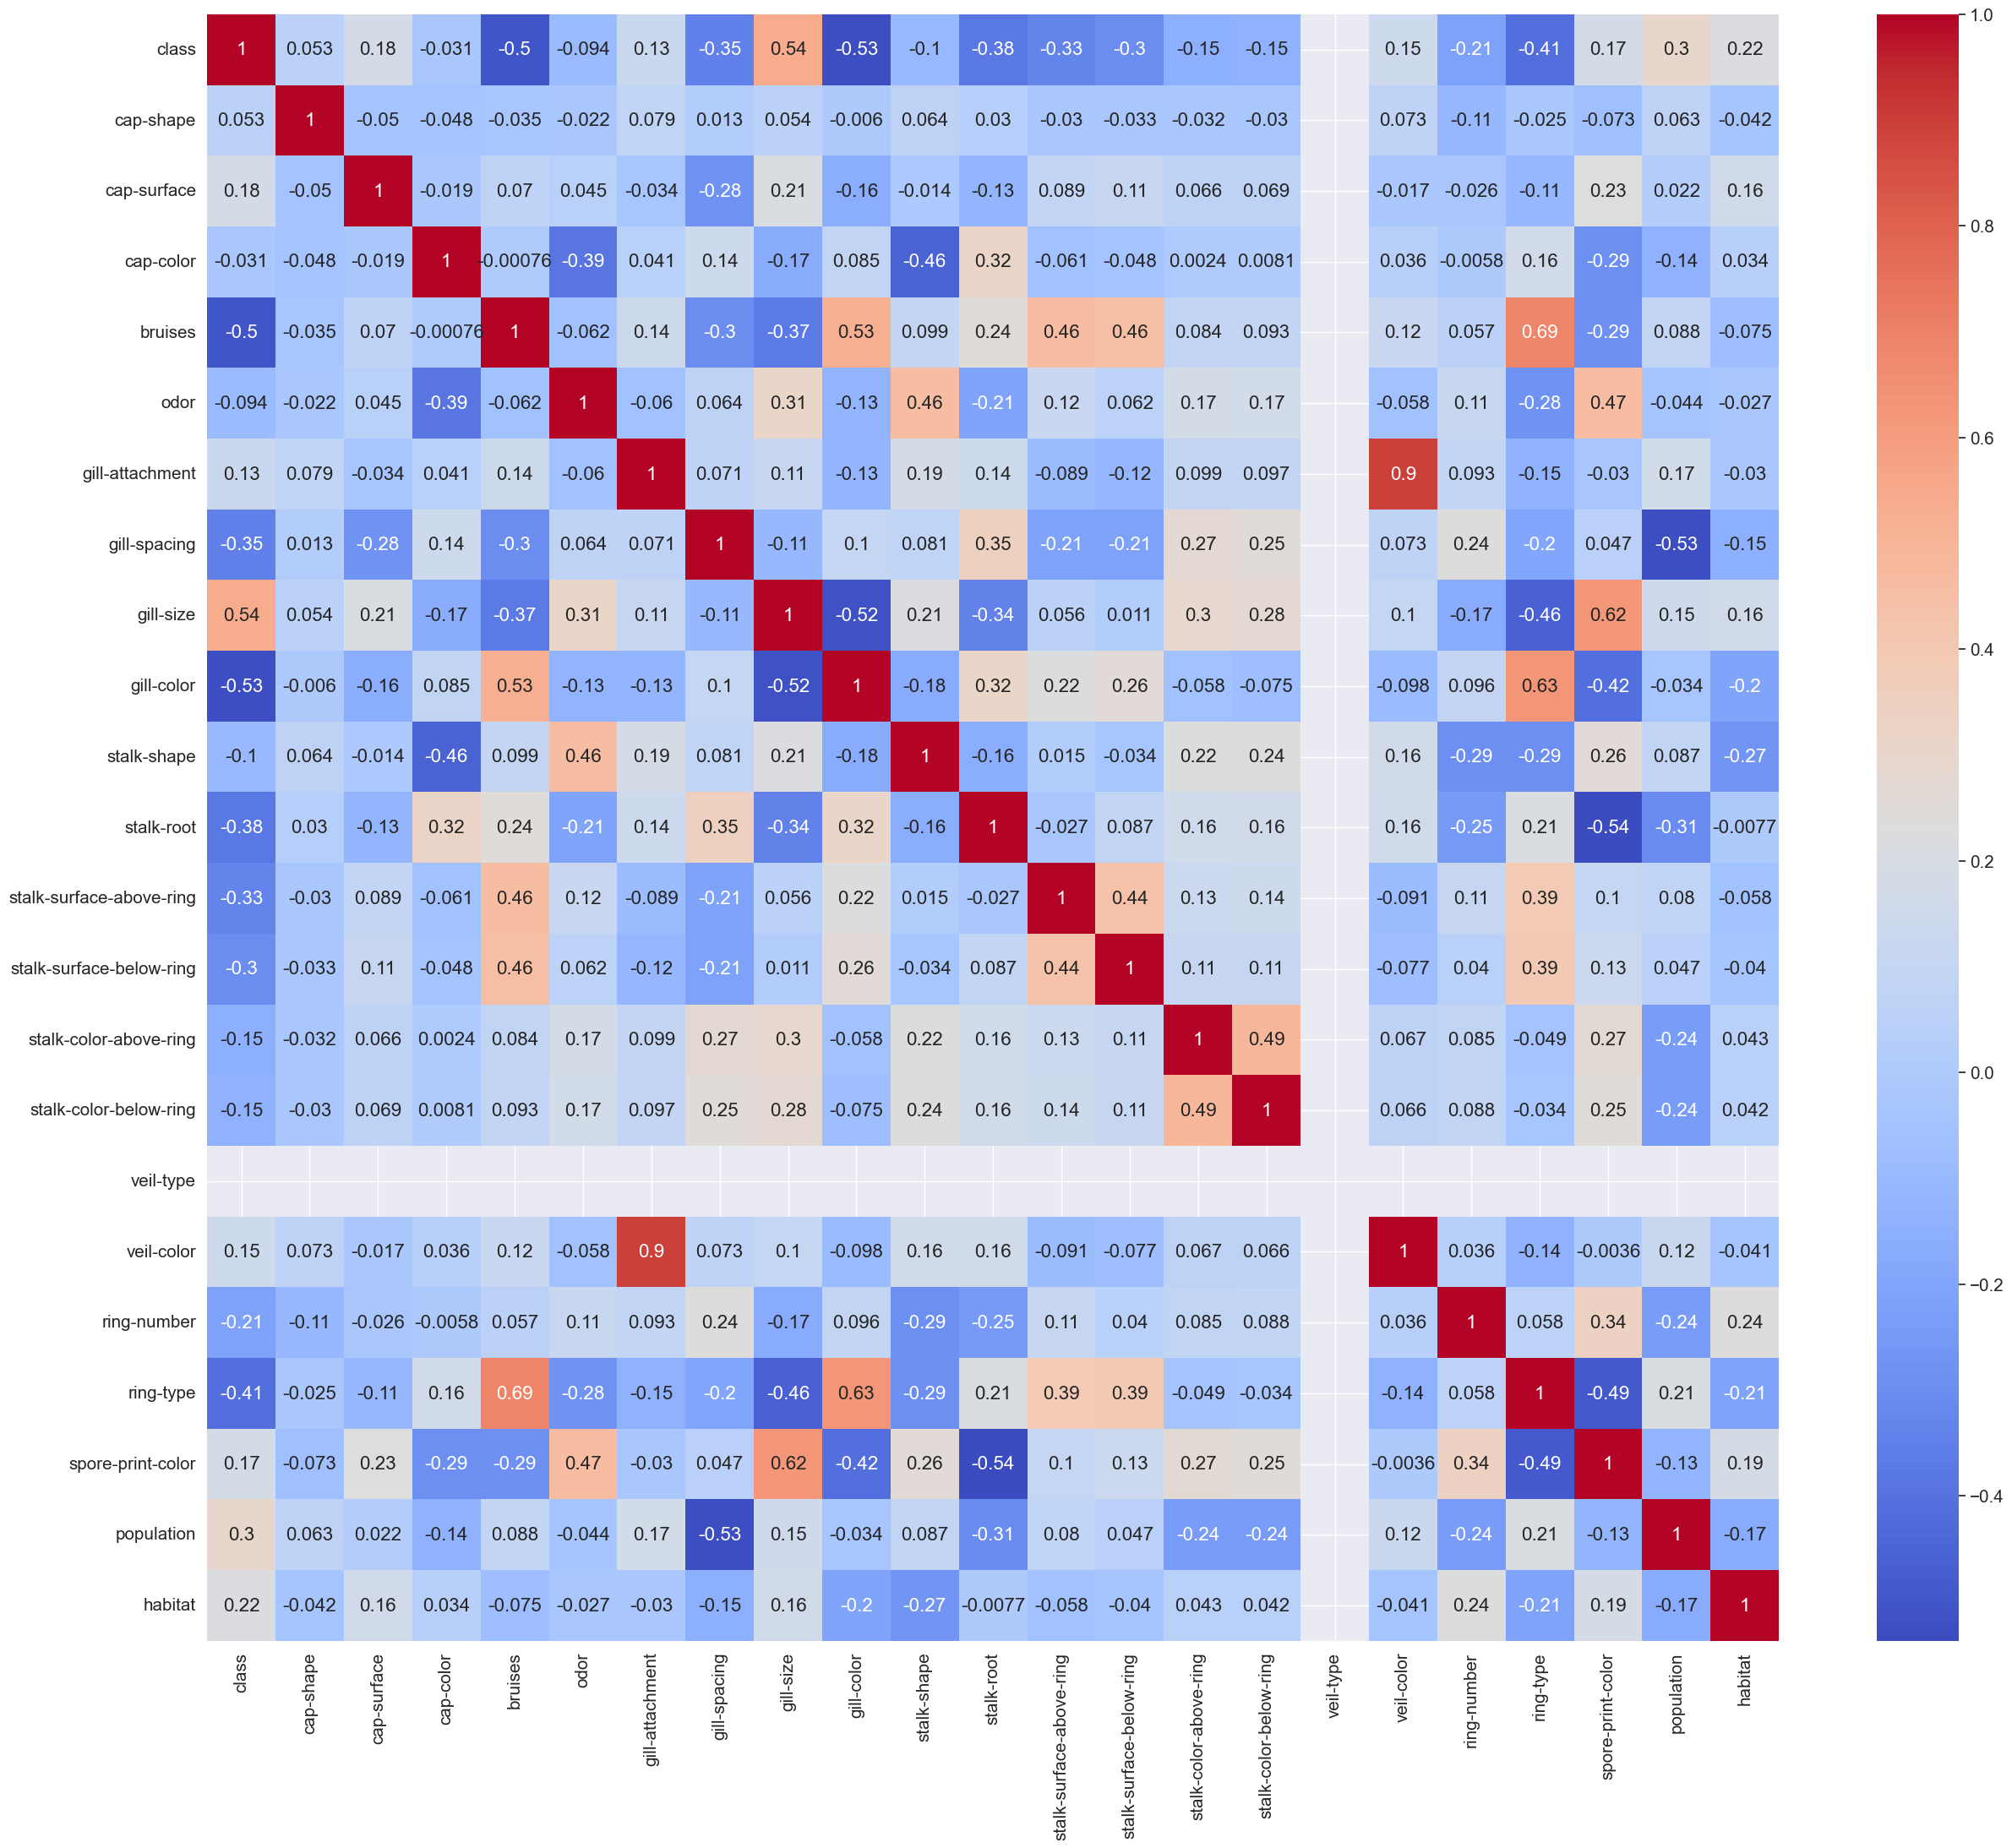

In [7]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(30, 25))
sns.set(font_scale=1.35)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.show()

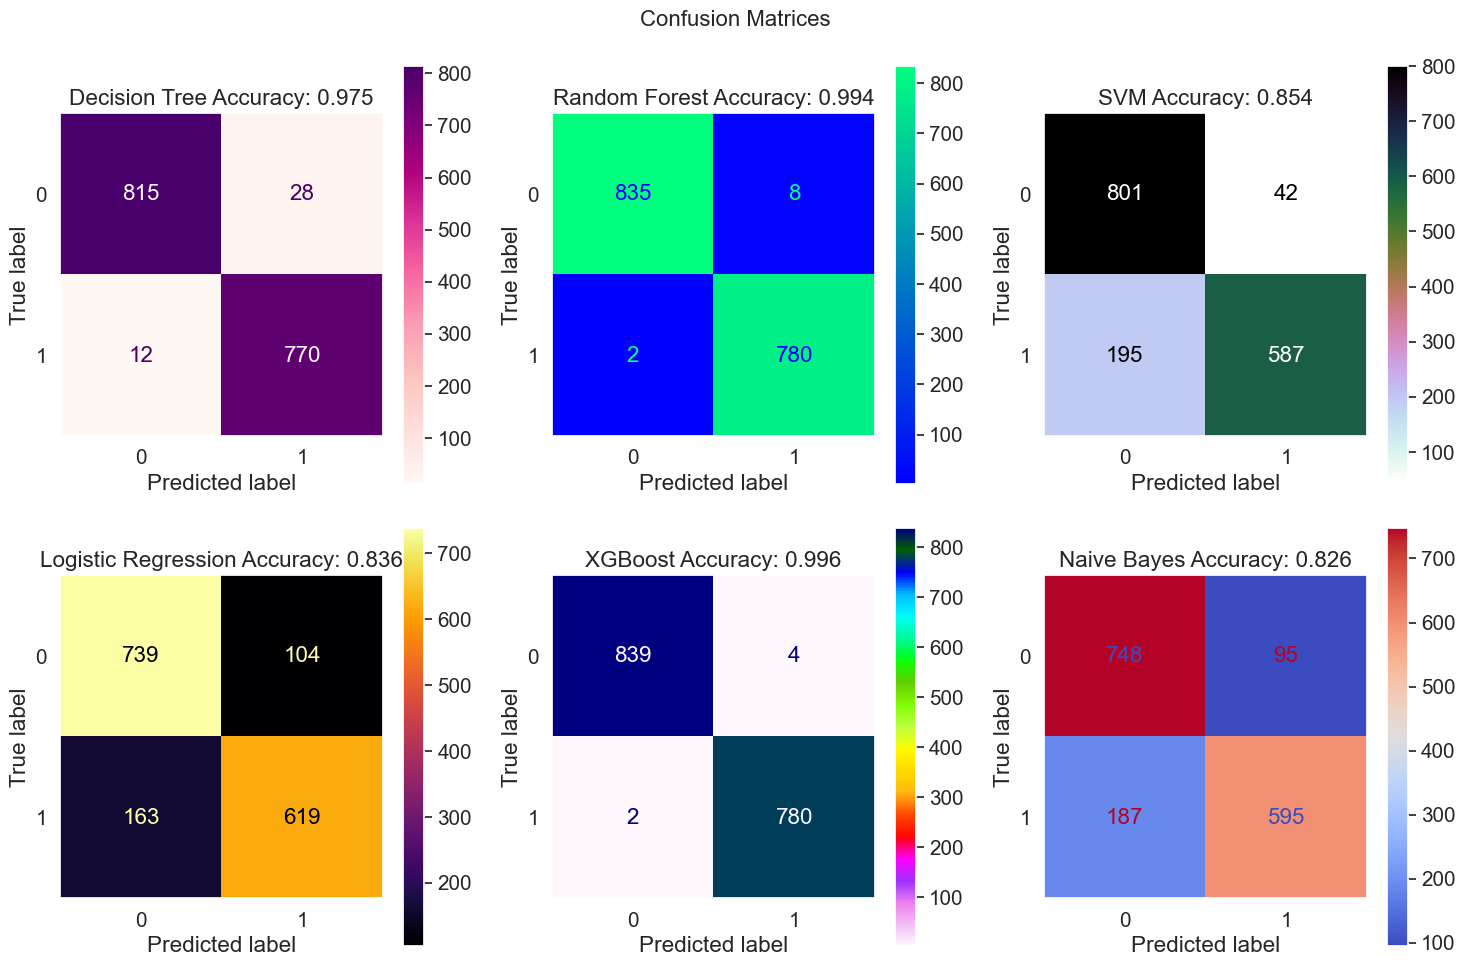

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
import itertools

algorithms =[
    #('KNN', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('SVM', SVC(kernel = 'linear', random_state = 42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    #('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('XGBoost', xgb.XGBClassifier(random_state=42)),
    ('Naive Bayes', GaussianNB())
]

# Define a list of colormaps to cycle through
colormaps = [plt.cm.RdPu, plt.cm.winter, plt.cm.cubehelix_r, plt.cm.inferno, plt.cm.gist_ncar_r, plt.cm.coolwarm]
colormap_cycle = itertools.cycle(colormaps)

# Create a figure with a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('Confusion Matrices', fontsize=16)

for ax, (name, algorithm) in zip(axes.flatten(), algorithms):
    
    # Train the model
    model = algorithm.fit(X_train, Y_train)
    
    # Make predictions
    Y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(Y_test, Y_pred)
    
    # Calculate confusion matrix
    cm = confusion_matrix(Y_test, Y_pred)
    
    # Plot confusion matrix with alternating colormap
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=next(colormap_cycle), ax=ax)
    ax.set_title(f"{name} Accuracy: {accuracy:.3f}")
    ax.grid(False)

# Adjust layout
plt.tight_layout()
plt.show()

## Implementation of ANN

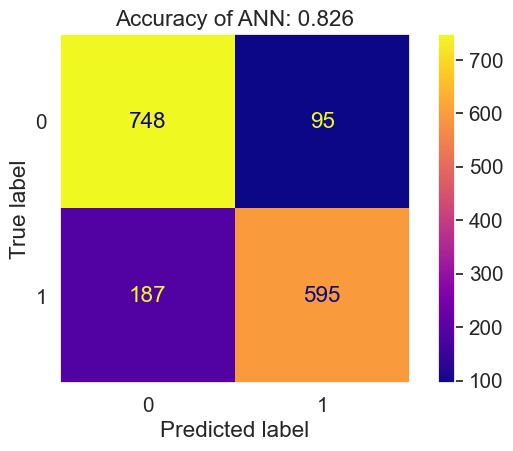

In [9]:
# Convert probabilities to class labels
Y_pred_classes = np.where(Y_pred > 0.5, 1, 0)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred_classes)

# Calculate confusion matrix
cm = confusion_matrix(Y_test, Y_pred_classes)

# Define class labels manually for binary classification
class_labels = [0, 1]

# Plot confusion matrix with alternating colormap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

# Create a figure and axis for plotting
fig, ax = plt.subplots()

# Plot the confusion matrix
disp.plot(cmap=plt.cm.plasma, ax=ax)

# Set title and grid
ax.set_title(f"Accuracy of ANN: {accuracy:.3f}")
ax.grid(False)

# Adjust layout
plt.tight_layout()
plt.show()